# xAPI-SG Processor

### Processor of traces following the Experience API for Serious Games Profile (xAPI-SG)

**xAPI-SG main reference:**  
*Applying standards to systematize learning analytics in serious games.
Ángel Serrano-Laguna, Iván Martínez-Ortiz, Jason Haag, Damon Regan, Andy Johnson, Baltasar Fernández-Manjón 
Computer Standards & Interfaces 50 (2017) 116–123, http://dx.doi.org/10.1016/j.csi.2016.09.014*

Further info on GitHub wiki page: https://github.com/e-ucm/rage-analytics/wiki/xAPI-SG-Profile 

The following code:
- expects as input a JSON file with a list of xAPI-SG statements
- analyzes the xAPI-SG statements and fills an adaptation of the default ser of visualizations
https://github.com/e-ucm/rage-analytics/wiki/Default-visualizations-teacher 

In [85]:
import json
from typing import Dict, Any
import numpy as np
from datetime import datetime
import copy
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
from collections import Counter

In [86]:
%run ProcessxAPISGStatement.ipynb # notebook to process an xAPI-SG statement

In [87]:
# file with xAPI-SG statements      
location="./" # file location
file_name="xapi-sg-sample-data.json" # file name
#file_name="conectado_xapi-statement.json"

players_info: Dict[Any, Any] = {} # dict with players info
start_time = datetime.now() 

## FILE MUST CONTAIN LIST OF XAPI-SG PROFILE TRACES
## (traces separated by commas and enclosed by []) 
with open(location+file_name, 'r') as f:
    statements_dict = json.load(f)
    for s in statements_dict:
        process_xapisg_statement(s, players_info)
    
end_time = datetime.now()

import pprint
pprint.pprint(players_info)

{'James Dean': {'alternatives': {'CapitalOfFlorida': [('Miami', 'False'),
                                                      ('Tallahassee', 'True')],
                                 'CapitalOfSpain': [('Madrid', 'True')]},
                'completables_progress': {'MyFirstGame': 0.99, 'World1-2': 0.5},
                'completables_scores': {'MyFirstGame': 95, 'World1-2': 95},
                'completables_times': {'MyFirstGame': ('2016-05-24T15:13:47Z',
                                                       '2016-05-24T15:37:13Z'),
                                       'World1-2': ('2016-05-24T15:03:47Z',
                                                    '2016-05-24T15:37:13Z')},
                'game_completed': True,
                'game_progress_per_time': [[0.45,
                                            datetime.datetime(2016, 5, 24, 15, 5, 49)],
                                           [0.8,
                                            datetime.datetime(2016, 5, 24, 

**Pie chart with number of games started and completed**

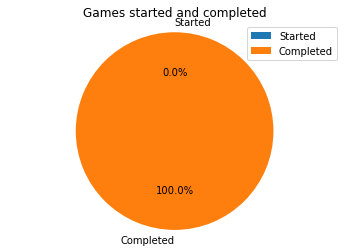

In [88]:
%run vis/xAPISG-GamesStartedCompleted.ipynb
vis_games_started_completed(players_info)

**Bar chart with number of times each video was seen and skipped**

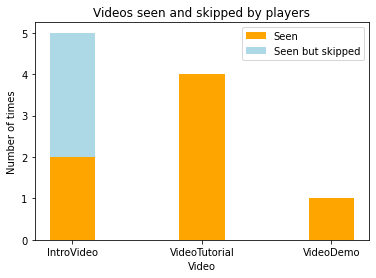

In [89]:
%run vis/xAPISG-VideosSeenSkipped.ipynb
vis_videos_seen_skipped(players_info)

**Line chart with progress of players per time**

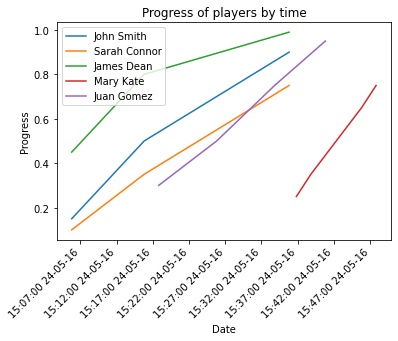

In [90]:
%run vis/xAPISG-PlayersProgress.ipynb
vis_players_progress(players_info)

**Bar chart with scores of players in each completable**

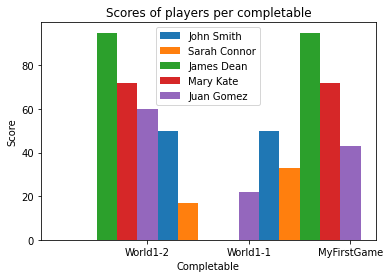

In [91]:
%run vis/xAPISG-CompletablesScores.ipynb
vis_completables_scores(players_info)

**Bar chart with progress of players in each completable**

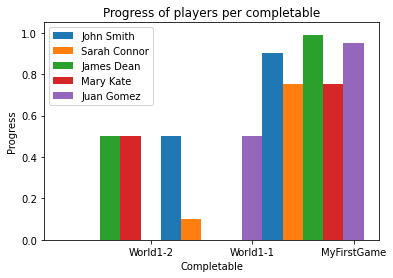

In [92]:
%run vis/xAPISG-CompletablesProgress.ipynb
vis_completables_progress(players_info)

**Bar chart with max and min completion time in each completable**

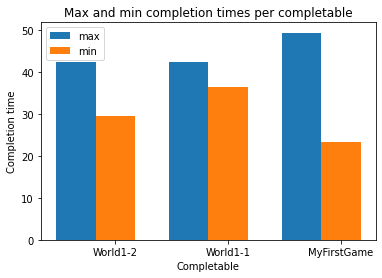

In [93]:
%run vis/xAPISG-CompletablesTimes.ipynb
vis_completables_times(players_info)

**Bar chart with number of correct and incorrect answers per player**

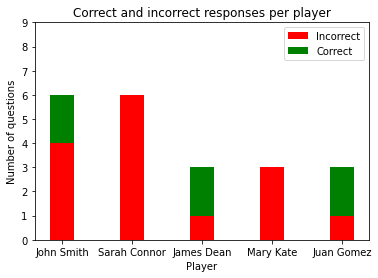

In [94]:
%run vis/xAPISG-CorrectIncorrectPlayer.ipynb
vis_correct_incorrect_player(players_info)

**Bar chart with number of correct and incorrect answers per question (alternative)**

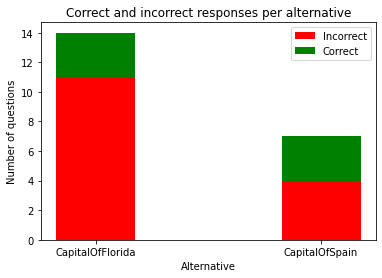

In [95]:
%run vis/xAPISG-CorrectIncorrectQuestion.ipynb
vis_correct_incorrect_question(players_info)

**Bar chart per question, with number of times each alternative has been selected**

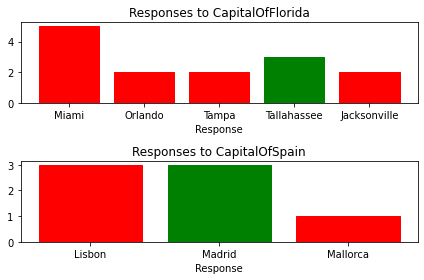

In [96]:
%run vis/xAPISG-AlternativesSelectedQuestion.ipynb
vis_alternatives_selected_question(players_info)